# Análise Descritiva - Dados do Seguro Médico nos EUA


### *"Como os fatores demográficos e comportamentais afetam o preço do seguro médico nos EUA"*

Primeiro, devemos observar como está estruturado o conjunto de dados:

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

medical_insurance = pd.read_csv('insurance.csv')
print(medical_insurance.head(10))

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
5   31  female  25.740         0     no  southeast   3756.62160
6   46  female  33.440         1     no  southeast   8240.58960
7   37  female  27.740         3     no  northwest   7281.50560
8   37    male  29.830         2     no  northeast   6406.41070
9   60  female  25.840         0     no  northwest  28923.13692


O conjunto possui 1338 registros ou linhas, e 7 colunas.
Possui 4 variáveis numéricas/quantitativas, sendo 2 delas discretas e 2 contínuas, e 3 variáveis categóricas/qualitativas.

## Análise Descritiva - Métricas

### Medidas de Tendência Central

#### Média

Calculando a média para as variáveis quantitativas:

In [2]:
avg_age = round(medical_insurance.age.mean(), 1)
avg_bmi = round(medical_insurance.bmi.mean(), 2)
avg_n_of_children = round(medical_insurance.children.mean())
avg_charges = round(medical_insurance.charges.mean())

print(f"""
As médias das variáveis quantitativas/numéricas são:
- Idade: {avg_age} anos
- IMC: {avg_bmi} 
- N° de filhos: {avg_n_of_children} filho
- Custos: ${avg_charges},00
""")

max_children = medical_insurance.children.max()
max_children


As médias das variáveis quantitativas/numéricas são:
- Idade: 39.2 anos
- IMC: 30.66 
- N° de filhos: 1 filho
- Custos: $13270,00



5

In [3]:
print("Métricas da variável 'Idade':")

age_median = medical_insurance.age.median()
age_std = medical_insurance.age.std()
age_min = medical_insurance.age.min()
age_max = medical_insurance.age.max()

print(f"Mediana: {age_median}\nDesvio Padrão: {round(age_std)}\nMínimo: {age_min}\nMáximo: {age_max}")

Métricas da variável 'Idade':
Mediana: 39.0
Desvio Padrão: 14
Mínimo: 18
Máximo: 64


In [4]:
print("Métricas da variável 'BMI':")

bmi_mean = medical_insurance.bmi.mean()
bmi_median = medical_insurance.bmi.median()
bmi_std = medical_insurance.bmi.std()
bmi_min = medical_insurance.bmi.min()
bmi_max = medical_insurance.bmi.max()

print(f"Media: {round(bmi_mean)}\nMediana: {bmi_median}\nDesvio Padrão: {round(bmi_std)}\nMínimo: {bmi_min}\nMáximo: {bmi_max}")

Métricas da variável 'BMI':
Media: 31
Mediana: 30.4
Desvio Padrão: 6
Mínimo: 15.96
Máximo: 53.13


In [5]:
print("Métricas da variável 'Charges':")

charges_mean = medical_insurance.charges.mean()
charges_median = medical_insurance.charges.median()
charges_std = medical_insurance.charges.std()
charges_min = medical_insurance.charges.min()
charges_max = medical_insurance.charges.max()
quartiles = medical_insurance.charges.quantile([0.25, 0.75])
iqr = quartiles[0.75] - quartiles[0.25]

print(f"Media: {round(charges_mean)}\nMediana: {charges_median}\nDesvio Padrão: {round(charges_std)}\nMínimo: {charges_min}\nMáximo: {charges_max}\nIQR: {iqr}")

Métricas da variável 'Charges':
Media: 13270
Mediana: 9382.033
Desvio Padrão: 12110
Mínimo: 1121.8739
Máximo: 63770.42801
IQR: 11899.625365


In [6]:
# Fazendo a média de uma região em específico

avg_kids_southeast = medical_insurance.loc[medical_insurance.region == 'southeast'].children.mean()
southeast = medical_insurance.loc[medical_insurance.region == 'southeast'].sex.count()
avg_price_southeast = round(medical_insurance.loc[medical_insurance.region == 'southeast'].charges.mean(), 2)
print(f"A média de filhos na região Sudeste é: {avg_kids_southeast}, {southeast}, ${avg_price_southeast}")

A média de filhos na região Sudeste é: 1.0494505494505495, 364, $14735.41


In [7]:
avg_kids_southwest = medical_insurance.loc[medical_insurance.region == 'southwest'].children.mean()
avg_price_southwest = round(medical_insurance.loc[medical_insurance.region == 'southwest'].charges.mean(), 2)
print(f"A média de filhos na região Sudoeste é: {avg_kids_southwest}, ${avg_price_southwest}")

A média de filhos na região Sudoeste é: 1.1415384615384616, $12346.94


In [8]:
avg_kids_northeast = medical_insurance.loc[medical_insurance.region == 'northeast'].children.mean()
northeast = medical_insurance.loc[medical_insurance.region == 'northeast'].children.count()
avg_price_northeast = round(medical_insurance.loc[medical_insurance.region == 'northeast'].charges.mean(), 2)
print(f"A média de filhos na região Nordeste é: {avg_kids_northeast}, {northeast}, ${avg_price_northeast}")

A média de filhos na região Nordeste é: 1.0462962962962963, 324, $13406.38


In [9]:
avg_kids_northwest = medical_insurance.loc[medical_insurance.region == 'northwest'].children.mean()
avg_price_northwest = round(medical_insurance.loc[medical_insurance.region == 'northwest'].charges.mean(), 2)
print(f"A média de filhos na região Noroeste é: {avg_kids_northwest}, ${avg_price_northwest}")

A média de filhos na região Noroeste é: 1.1476923076923078, $12417.58


In [10]:
smoker_charges = medical_insurance.loc[medical_insurance.smoker == 'yes'].charges.mean()
smoker_charges

32050.23183153284

In [11]:
non_smoker_charges = medical_insurance.loc[medical_insurance.smoker == 'no'].charges.mean()
non_smoker_charges

8434.268297856204

In [12]:
underweight = medical_insurance.loc[medical_insurance.bmi < 18.5].charges.mean()
underweight

8852.200585

In [13]:
normal = medical_insurance.loc[(medical_insurance.bmi >= 18.5) & (medical_insurance.bmi < 25)].charges.mean()
normal

10409.337708977777

In [14]:
overweight = medical_insurance.loc[(medical_insurance.bmi >= 25) & (medical_insurance.bmi < 30)].charges.mean()
overweight

10987.509891318654

In [15]:
obese = medical_insurance.loc[(medical_insurance.bmi >= 30) & (medical_insurance.bmi < 35)].charges.mean()
obese

14419.674969693097

In [16]:
xtrm_obese = medical_insurance.loc[(medical_insurance.bmi >= 35)].charges.mean()
xtrm_obese

16953.82361816456

In [17]:
max_price = medical_insurance.charges.max()
id_max = medical_insurance.loc[(medical_insurance.charges == max_price)]
id_max

,age,sex,bmi,children,smoker,region,charges
543,54,female,47.41,0,yes,southeast,63770.42801


In [18]:
charges_std_dev = medical_insurance.charges.std()
charges_std_dev

12110.011236693994

In [19]:
smoker_charges_std_dev = medical_insurance.loc[medical_insurance.smoker == 'yes'].charges.std()
smoker_charges_std_dev

11541.547175589121

In [20]:
non_smoker_charges_std_dev = medical_insurance.loc[medical_insurance.smoker == 'no'].charges.std()
non_smoker_charges_std_dev

5993.781819194933

In [21]:
low_bmi_smoker_charges_mean = medical_insurance.loc[(medical_insurance.smoker == 'yes') &
                                                    (medical_insurance.bmi < 25)].charges.mean()
low_bmi_smoker_charges_mean

19839.27830854546

In [22]:
high_bmi_smoker_charges_mean = medical_insurance.loc[(medical_insurance.smoker == 'yes') &
                                                    (medical_insurance.bmi > 25)].charges.mean()
high_bmi_smoker_charges_mean

35116.90965694064

In [23]:
low_bmi_non_smoker_charges_mean = medical_insurance.loc[(medical_insurance.smoker == 'no') &
                                                    (medical_insurance.bmi < 25)].charges.mean()
low_bmi_non_smoker_charges_mean

7515.708890789475

In [24]:
high_bmi_non_smoker_charges_mean = medical_insurance.loc[(medical_insurance.smoker == 'no') &
                                                    (medical_insurance.bmi > 25)].charges.mean()
high_bmi_non_smoker_charges_mean

8629.589609712157

In [25]:
smoker_children_mean = medical_insurance.loc[(medical_insurance.smoker == 'yes') & 
                                             (medical_insurance.age > 24)].children.mean()
smoker_children_mean

1.2429906542056075

In [26]:
non_smoker_children_mean = medical_insurance.loc[(medical_insurance.smoker == 'no') & 
                                                 (medical_insurance.age > 24)].children.mean()
non_smoker_children_mean

1.218676122931442

In [27]:
male_charges = medical_insurance.loc[medical_insurance.sex == 'male'].charges.mean()
male_charges

13956.751177721893

In [28]:
female_charges = medical_insurance.loc[medical_insurance.sex == 'female'].charges.mean()
female_charges

12569.578843835347

In [29]:
male_smoker_count = medical_insurance.loc[(medical_insurance.sex == 'male') & 
                                    (medical_insurance.smoker == 'yes')].children.count()
male_count = medical_insurance.loc[(medical_insurance.sex == 'male')].children.count()

male_smoker_ratio = round((male_smoker_count / male_count) * 100)

male_smoker_ratio

24

In [30]:
female_smoker_count = medical_insurance.loc[(medical_insurance.sex == 'female') & 
                                    (medical_insurance.smoker == 'yes')].children.count()
female_count = medical_insurance.loc[(medical_insurance.sex == 'female')].children.count()

female_smoker_ratio = round((female_smoker_count / female_count) * 100)

female_smoker_ratio

17

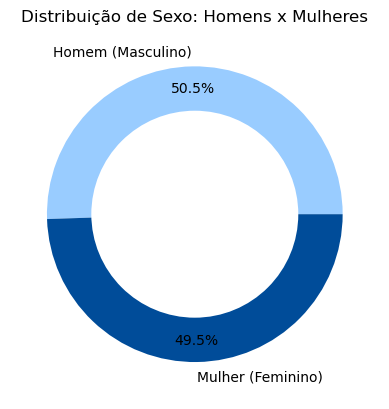

In [31]:
distribution = [0, 0]
males = medical_insurance.loc[medical_insurance.sex == "male"].sex.count()
females = medical_insurance.loc[medical_insurance.sex == "female"].sex.count()
distribution[0], distribution[1] = males, females

#-Setting labels for items in Chart
label = ['Homem (Masculino)','Mulher (Feminino)']

#-colors
colors = ['#99CCFF', '#004C99']

#-Pie Chart
plt.pie(distribution, colors=colors, labels=label, autopct='%1.1f%%', pctdistance=0.85)

#-draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()

#-Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

#-Adding Title of chart
plt.title('Distribuição de Sexo: Homens x Mulheres')

#-Displaying Chart
plt.show()

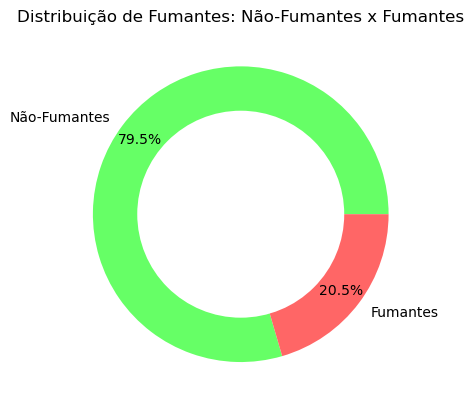

In [32]:
distribution = [0, 0]
non_smoker = medical_insurance.loc[medical_insurance.smoker == "no"].smoker.count()
smoker = medical_insurance.loc[medical_insurance.smoker == "yes"].smoker.count()
distribution[0], distribution[1] = non_smoker, smoker



#-Setting labels for items in Chart
label = ['Não-Fumantes','Fumantes']

#-colors
colors = ['#66FF66', '#FF6666']

#-Pie Chart
plt.pie(distribution, colors=colors, labels=label, autopct='%1.1f%%', pctdistance=0.85)

#-draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()

#-Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

#-Adding Title of chart
plt.title('Distribuição de Fumantes: Não-Fumantes x Fumantes')

#-Displaying Chart
plt.show()

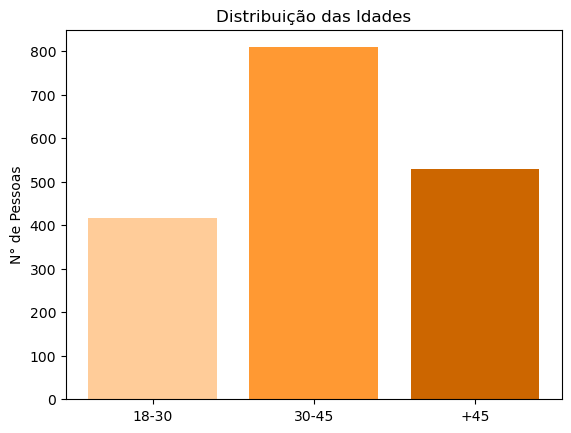

In [33]:
age_categories = ["18-30", "30-45", "+45"]

age_amount = list()
age_amount.append(medical_insurance.loc[medical_insurance.age < 30].age.count())
age_amount.append(medical_insurance.loc[medical_insurance.age < 45].age.count())
age_amount.append(medical_insurance.loc[medical_insurance.age >= 45].age.count())

#-Colors 
colors = ["#FFCC99", "#FF9933", "#CC6600"]

#-Plot the bars accordinly to the y-coordinates (service_amount) and x-coordinates
plt.bar(range(len(age_categories)), age_amount, color=colors, width=0.8)

#-Adding chart title
plt.title("Distribuição das Idades")

#-Naming the y-axis
plt.ylabel("N° de Pessoas")

#-Naming the bars accordinly
plt.xticks(range(len(age_categories)), age_categories)

#-Displaying chart
plt.show()


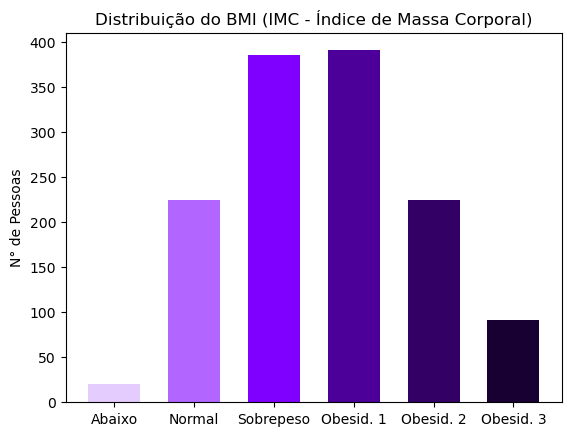

In [34]:
bmi_categories = ["Abaixo", "Normal", "Sobrepeso", "Obesid. 1", "Obesid. 2", "Obesid. 3"]

bmi_amount = list()
bmi_amount.append(medical_insurance.loc[medical_insurance.bmi < 18.5].bmi.count())
bmi_amount.append(medical_insurance.loc[(medical_insurance.bmi >= 18.5) & (medical_insurance.bmi < 25)].bmi.count())
bmi_amount.append(medical_insurance.loc[(medical_insurance.bmi >= 25) & (medical_insurance.bmi < 30)].bmi.count())
bmi_amount.append(medical_insurance.loc[(medical_insurance.bmi >= 30) & (medical_insurance.bmi < 35)].bmi.count())
bmi_amount.append(medical_insurance.loc[(medical_insurance.bmi >= 35) & (medical_insurance.bmi < 40)].bmi.count())
bmi_amount.append(medical_insurance.loc[(medical_insurance.bmi >= 40)].bmi.count())

#-Colors 
colors = ["#E5CCFF", "#B266FF", "#7F00FF", "#4C0099", "#330066", "#190033"]

#-Plot the bars accordinly to the y-coordinates (service_amount) and x-coordinates
plt.bar(range(len(bmi_categories)), bmi_amount, color=colors, width=0.65)

#-Adding chart title
plt.title("Distribuição do BMI (IMC - Índice de Massa Corporal)")

#-Naming the y-axis
plt.ylabel("N° de Pessoas")

#-Naming the bars accordinly
plt.xticks(range(len(bmi_categories)), bmi_categories)

#-Displaying chart
plt.show()

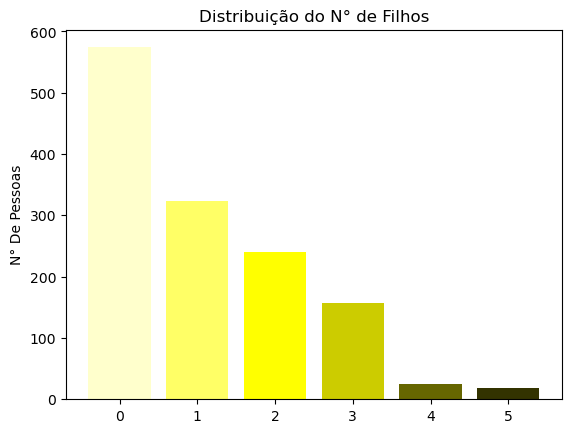

In [35]:
children_categories = ["0", "1", "2", "3", "4", "5"]

children_amount = list()
children_amount.append(medical_insurance.loc[medical_insurance.children == 0].children.count())
children_amount.append(medical_insurance.loc[medical_insurance.children == 1].children.count())
children_amount.append(medical_insurance.loc[medical_insurance.children == 2].children.count())
children_amount.append(medical_insurance.loc[medical_insurance.children == 3].children.count())
children_amount.append(medical_insurance.loc[medical_insurance.children == 4].children.count())
children_amount.append(medical_insurance.loc[medical_insurance.children == 5].children.count())

#-Colors 
colors = ["#FFFFCC", "#FFFF66", "#FFFF00", "#CCCC00", "#666600", "#333300"]

#-Plot the bars accordinly to the y-coordinates (service_amount) and x-coordinates
plt.bar(range(len(children_categories)), children_amount, color=colors, width=0.8)

#-Adding chart title
plt.title("Distribuição do N° de Filhos")

#-Naming the y-axis
plt.ylabel("N° De Pessoas")

#-Naming the bars accordinly
plt.xticks(range(len(children_categories)), children_categories)

#-Displaying chart
plt.show()

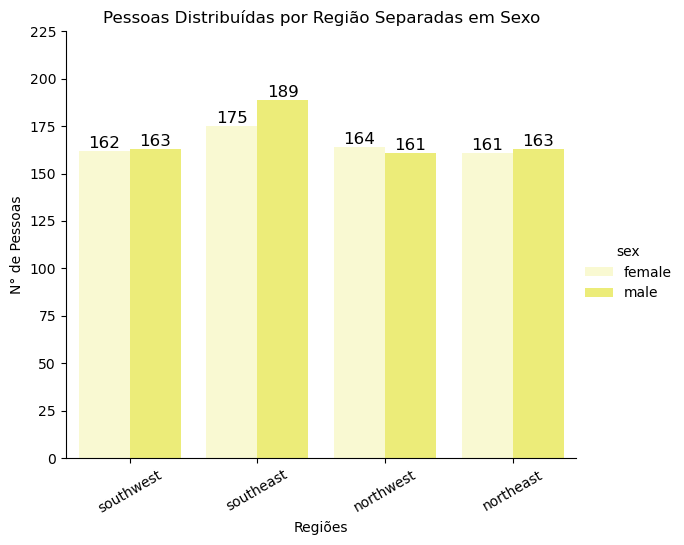

In [36]:
g = sns.catplot(data=medical_insurance, x='region',hue='sex', kind='count', aspect=1.2, palette=colors)
for ax in g.axes.flat:
    ax.set(title='Pessoas Distribuídas por Região Separadas em Sexo', xlabel='Regiões', ylabel='N° de Pessoas')
    ax.set_yticks([y for y in range(0, 250, 25)])
    ax.tick_params('x', labelrotation=30)
    
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{round(height)}', (p.get_x()+p.get_width()/2, height), ha='center', va='bottom', color='black', size=12)

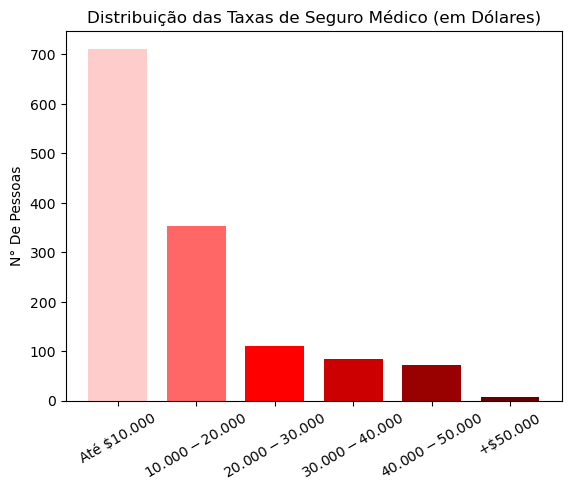

In [37]:
charges_categories = ["Até $10.000", "$10.000-$20.000", "$20.000-$30.000", "$30.000-$40.000", "$40.000-$50.000", "+$50.000"]

charges_amount = list()
charges_amount.append(medical_insurance.loc[medical_insurance.charges < 10000].charges.count())
charges_amount.append(medical_insurance.loc[(medical_insurance.charges >= 10000) & 
                                            (medical_insurance.charges < 20000)].charges.count())
charges_amount.append(medical_insurance.loc[(medical_insurance.charges >= 20000) &
                                           (medical_insurance.charges < 30000)].charges.count())
charges_amount.append(medical_insurance.loc[(medical_insurance.charges >= 30000) &
                                           (medical_insurance.charges < 40000)].charges.count())
charges_amount.append(medical_insurance.loc[(medical_insurance.charges >= 40000) &
                                           (medical_insurance.charges < 50000)].charges.count())
charges_amount.append(medical_insurance.loc[medical_insurance.charges > 50000].charges.count())

#-Colors 
colors = ["#FFCCCC", "#FF6666", "#FF0000", "#CC0000", "#990000", "#660000"]

#-Plot the bars accordinly to the y-coordinates (service_amount) and x-coordinates
plt.bar(range(len(charges_categories)), charges_amount, color=colors, width=0.75)

#-Adding chart title
plt.title("Distribuição das Taxas de Seguro Médico (em Dólares)")

#-Naming the y-axis
plt.ylabel("N° De Pessoas")

#-Naming the bars accordinly
plt.xticks(range(len(charges_categories)), charges_categories, rotation=30)

#-Displaying chart
plt.show()

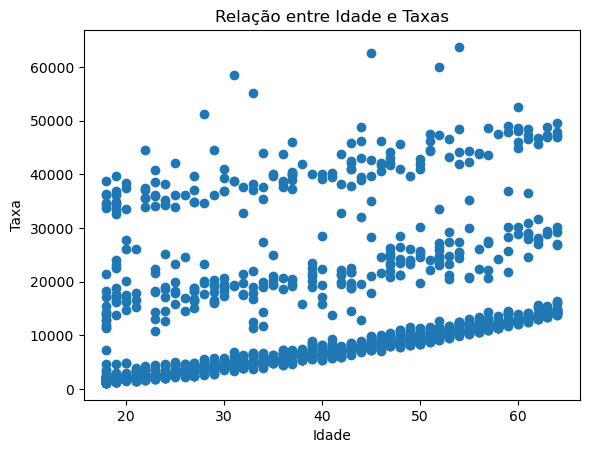

In [38]:
age_values = np.array(medical_insurance.age)
insurance_values = np.array(medical_insurance.charges)

plt.scatter(age_values, insurance_values)

plt.title("Relação entre Idade e Taxas")

plt.xlabel("Idade")

plt.ylabel("Taxa")

plt.show()

In [39]:
correlation_coefficient = medical_insurance.age.corr(medical_insurance.charges)

print(f"O coeficiente de correlação entre essas variáveis é {round(correlation_coefficient, 1)}")

O coeficiente de correlação entre essas variáveis é 0.3


In [40]:
# Quanto maior o C.C maior o STD (?)

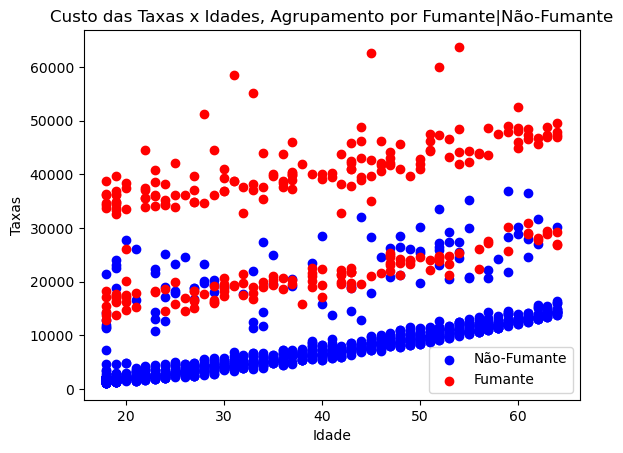

In [41]:
age_non_smoker = np.array(medical_insurance.loc[medical_insurance.smoker == "no"].age) 
charges_non_smoker = np.array(medical_insurance.loc[medical_insurance.smoker == "no"].charges) 

age_smoker = np.array(medical_insurance.loc[medical_insurance.smoker == "yes"].age) 
charges_smoker = np.array(medical_insurance.loc[medical_insurance.smoker == "yes"].charges) 

plt.scatter(age_non_smoker, charges_non_smoker, color='blue', label='Não-Fumante')

plt.scatter(age_smoker, charges_smoker, color='red', label='Fumante')

plt.xlabel('Idade')
plt.ylabel('Taxas')
plt.title('Custo das Taxas x Idades, Agrupamento por Fumante|Não-Fumante')

plt.legend()

plt.show()

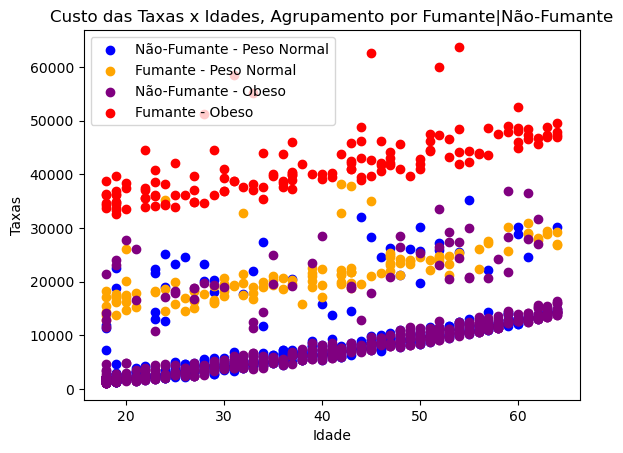

In [42]:
age_non_smoker_thin = np.array(medical_insurance.loc[(medical_insurance.smoker == "no") &
                                                     (medical_insurance.bmi <= 30)].age) 

charges_non_smoker_thin = np.array(medical_insurance.loc[(medical_insurance.smoker == "no") &
                                                         (medical_insurance.bmi <= 30)].charges) 

age_non_smoker_fat = np.array(medical_insurance.loc[(medical_insurance.smoker == "no") &
                                                    (medical_insurance.bmi > 30)].age) 

charges_non_smoker_fat = np.array(medical_insurance.loc[(medical_insurance.smoker == "no") &
                                                   (medical_insurance.bmi > 30) ].charges)

age_smoker_thin = np.array(medical_insurance.loc[(medical_insurance.smoker == "yes") &
                                                    (medical_insurance.bmi <= 30)].age)

charges_smoker_thin = np.array(medical_insurance.loc[(medical_insurance.smoker == "yes") &
                                                   (medical_insurance.bmi <= 30) ].charges )

age_smoker_fat = np.array(medical_insurance.loc[(medical_insurance.smoker == "yes") &
                                                    (medical_insurance.bmi > 30)].age)

charges_smoker_fat = np.array(medical_insurance.loc[(medical_insurance.smoker == "yes") &
                                                   (medical_insurance.bmi > 30)].charges) 

plt.scatter(age_non_smoker_thin, charges_non_smoker_thin, color='blue', label='Não-Fumante - Peso Normal')

plt.scatter(age_smoker_thin, charges_smoker_thin, color='orange', label='Fumante - Peso Normal')

plt.scatter(age_non_smoker_fat, charges_non_smoker_fat, color='purple', label='Não-Fumante - Obeso')

plt.scatter(age_smoker_fat, charges_smoker_fat, color='red', label='Fumante - Obeso')

plt.xlabel('Idade')
plt.ylabel('Taxas')
plt.title('Custo das Taxas x Idades, Agrupamento por Fumante|Não-Fumante')

plt.legend()

plt.show()

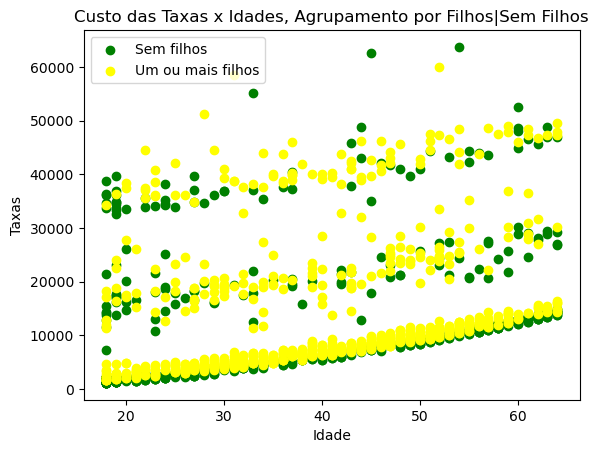

In [43]:
age_no_kids = np.array(medical_insurance.loc[(medical_insurance.children == 0)].age) 

charges_no_kids = np.array(medical_insurance.loc[(medical_insurance.children == 0)].charges) 

age_with_kids = np.array(medical_insurance.loc[(medical_insurance.children > 0)].age) 

charges_with_kids = np.array(medical_insurance.loc[(medical_insurance.children > 0)].charges)

plt.scatter(age_no_kids, charges_no_kids, color='green', label='Sem filhos')

plt.scatter(age_with_kids, charges_with_kids, color='yellow', label='Um ou mais filhos')

plt.xlabel('Idade')
plt.ylabel('Taxas')
plt.title('Custo das Taxas x Idades, Agrupamento por Filhos|Sem Filhos')

plt.legend()

plt.show()

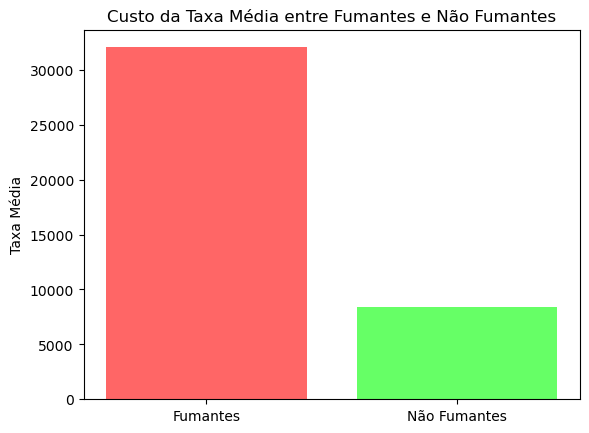

In [44]:
smoker_categories = ["Fumantes", "Não Fumantes"]

smoker_amount = list()
smoker_amount.append(medical_insurance.loc[medical_insurance.smoker == 'yes'].charges.mean())
smoker_amount.append(medical_insurance.loc[medical_insurance.smoker == 'no'].charges.mean())

#-colors
colors = ['#FF6666','#66FF66']

#-Plot the bars accordinly to the y-coordinates (service_amount) and x-coordinates
plt.bar(range(len(smoker_categories)), smoker_amount, color=colors, width=0.8)

#-Adding chart title
plt.title("Custo da Taxa Média entre Fumantes e Não Fumantes")

#-Naming the y-axis
plt.ylabel("Taxa Média")

#-Naming the bars accordinly
plt.xticks(range(len(smoker_categories)), smoker_categories)

#-Displaying chart
plt.show()

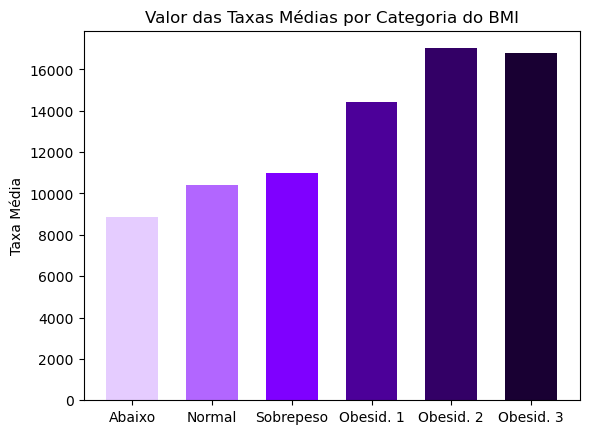

In [46]:
bmi_categories = ["Abaixo", "Normal", "Sobrepeso", "Obesid. 1", "Obesid. 2", "Obesid. 3"]

bmi_amount = list()
bmi_amount.append(medical_insurance.loc[medical_insurance.bmi < 18.5].charges.mean())
bmi_amount.append(medical_insurance.loc[(medical_insurance.bmi >= 18.5) & (medical_insurance.bmi < 25)].charges.mean())
bmi_amount.append(medical_insurance.loc[(medical_insurance.bmi >= 25) & (medical_insurance.bmi < 30)].charges.mean())
bmi_amount.append(medical_insurance.loc[(medical_insurance.bmi >= 30) & (medical_insurance.bmi < 35)].charges.mean())
bmi_amount.append(medical_insurance.loc[(medical_insurance.bmi >= 35) & (medical_insurance.bmi < 40)].charges.mean())
bmi_amount.append(medical_insurance.loc[(medical_insurance.bmi >= 40)].charges.mean())

#-Colors 
colors = ["#E5CCFF", "#B266FF", "#7F00FF", "#4C0099", "#330066", "#190033"]

#-Plot the bars accordinly to the y-coordinates (service_amount) and x-coordinates
plt.bar(range(len(bmi_categories)), bmi_amount, color=colors, width=0.65)

#-Adding chart title
plt.title("Valor das Taxas Médias por Categoria do BMI")

#-Naming the y-axis
plt.ylabel("Taxa Média")

#-Naming the bars accordinly
plt.xticks(range(len(bmi_categories)), bmi_categories)

#-Displaying chart
plt.show()

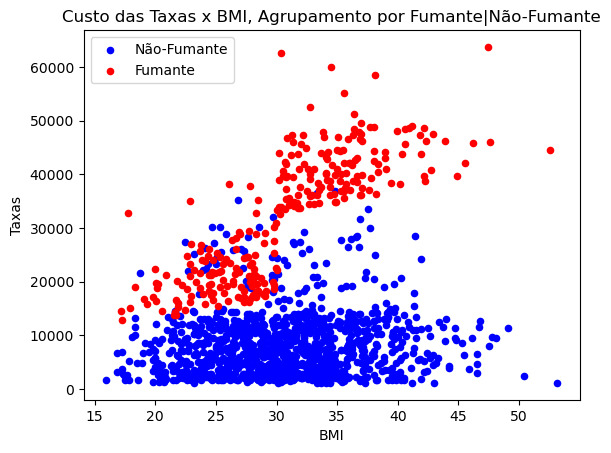

In [54]:
bmi_non_smoker = np.array(medical_insurance.loc[medical_insurance.smoker == "no"].bmi) 
charges_non_smoker = np.array(medical_insurance.loc[medical_insurance.smoker == "no"].charges) 

bmi_smoker = np.array(medical_insurance.loc[medical_insurance.smoker == "yes"].bmi) 
charges_smoker = np.array(medical_insurance.loc[medical_insurance.smoker == "yes"].charges) 

plt.scatter(bmi_non_smoker, charges_non_smoker, color='blue', label='Não-Fumante', s = 20)

plt.scatter(bmi_smoker, charges_smoker, color='red', label='Fumante', s = 20)

plt.xlabel('BMI')
plt.ylabel('Taxas')
plt.title('Custo das Taxas x BMI, Agrupamento por Fumante|Não-Fumante')

plt.legend()

plt.show()

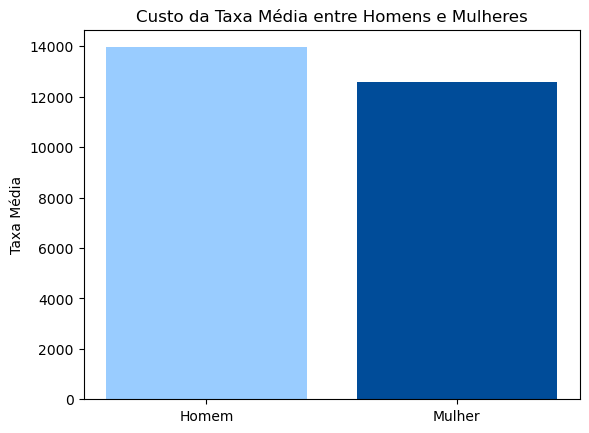

In [55]:
sex_categories = ["Homem", "Mulher"]

sex_amount = list()
sex_amount.append(medical_insurance.loc[medical_insurance.sex == 'male'].charges.mean())
sex_amount.append(medical_insurance.loc[medical_insurance.sex == 'female'].charges.mean())

#-colors
colors = ['#99CCFF', '#004C99']

#-Plot the bars accordinly to the y-coordinates (service_amount) and x-coordinates
plt.bar(range(len(sex_categories)), sex_amount, color=colors, width=0.8)

#-Adding chart title
plt.title("Custo da Taxa Média entre Homens e Mulheres")

#-Naming the y-axis
plt.ylabel("Taxa Média")

#-Naming the bars accordinly
plt.xticks(range(len(sex_categories)), sex_categories)

#-Displaying chart
plt.show()

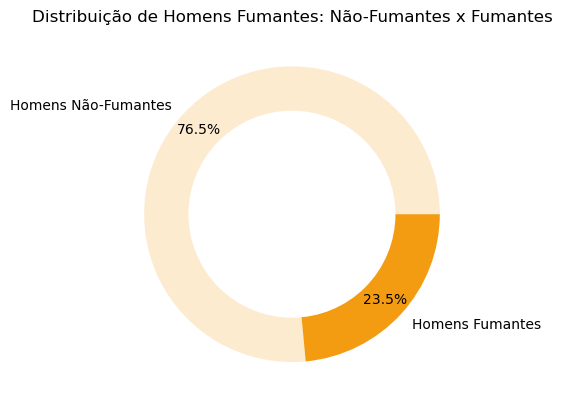

In [66]:
distribution = [0, 0]
non_smoker_male = medical_insurance.loc[(medical_insurance.smoker == "no") & (medical_insurance.sex == "male")].smoker.count()
smoker_male = medical_insurance.loc[(medical_insurance.smoker == "yes") & (medical_insurance.sex == "male")].smoker.count()
distribution[0], distribution[1] = non_smoker_male, smoker_male



#-Setting labels for items in Chart
label = ['Homens Não-Fumantes','Homens Fumantes']

#-colors
colors = ['#fdebd0', '#f39c12']

#-Pie Chart
plt.pie(distribution, colors=colors, labels=label, autopct='%1.1f%%', pctdistance=0.85)

#-draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()

#-Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

#-Adding Title of chart
plt.title('Distribuição de Homens Fumantes: Não-Fumantes x Fumantes')

#-Displaying Chart
plt.show()

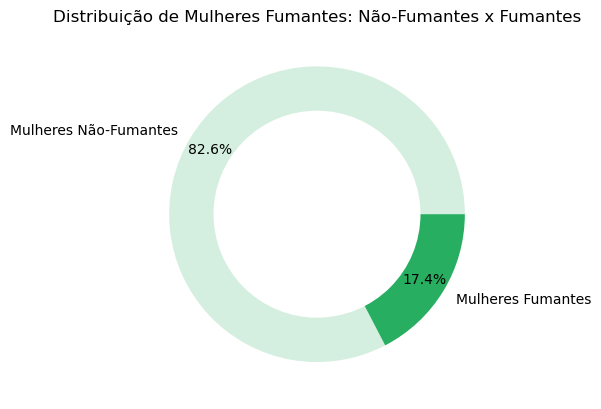

In [67]:
distribution = [0, 0]
non_smoker_female = medical_insurance.loc[(medical_insurance.smoker == "no") & (medical_insurance.sex == "female")].smoker.count()
smoker_female = medical_insurance.loc[(medical_insurance.smoker == "yes") & (medical_insurance.sex == "female")].smoker.count()
distribution[0], distribution[1] = non_smoker_female, smoker_female



#-Setting labels for items in Chart
label = ['Mulheres Não-Fumantes','Mulheres Fumantes']

#-colors
colors = ['#d4efdf', '#27ae60']

#-Pie Chart
plt.pie(distribution, colors=colors, labels=label, autopct='%1.1f%%', pctdistance=0.85)

#-draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()

#-Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

#-Adding Title of chart
plt.title('Distribuição de Mulheres Fumantes: Não-Fumantes x Fumantes')

#-Displaying Chart
plt.show()

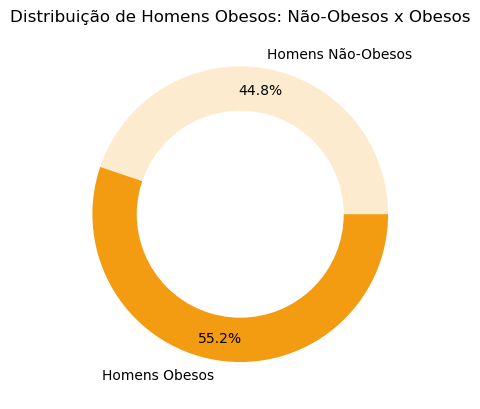

In [72]:
distribution = [0, 0]
non_obese_male = medical_insurance.loc[(medical_insurance.bmi < 30) & (medical_insurance.sex == "male")].smoker.count()
obese_male = medical_insurance.loc[(medical_insurance.bmi >= 30) & (medical_insurance.sex == "male")].smoker.count()
distribution[0], distribution[1] = non_obese_male, obese_male



#-Setting labels for items in Chart
label = ['Homens Não-Obesos','Homens Obesos']

#-colors
colors = ['#fdebd0', '#f39c12']

#-Pie Chart
plt.pie(distribution, colors=colors, labels=label, autopct='%1.1f%%', pctdistance=0.85)

#-draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()

#-Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

#-Adding Title of chart
plt.title('Distribuição de Homens Obesos: Não-Obesos x Obesos')

#-Displaying Chart
plt.show()

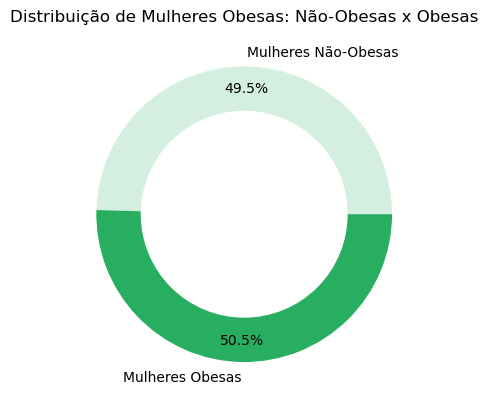

In [73]:
distribution = [0, 0]
non_obese_female = medical_insurance.loc[(medical_insurance.bmi < 30) & (medical_insurance.sex == "female")].smoker.count()
obese_female = medical_insurance.loc[(medical_insurance.bmi >= 30) & (medical_insurance.sex == "female")].smoker.count()
distribution[0], distribution[1] = non_obese_female, obese_female



#-Setting labels for items in Chart
label = ['Mulheres Não-Obesas','Mulheres Obesas']

#-colors
colors = ['#d4efdf', '#27ae60']

#-Pie Chart
plt.pie(distribution, colors=colors, labels=label, autopct='%1.1f%%', pctdistance=0.85)

#-draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()

#-Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

#-Adding Title of chart
plt.title('Distribuição de Mulheres Obesas: Não-Obesas x Obesas')

#-Displaying Chart
plt.show()

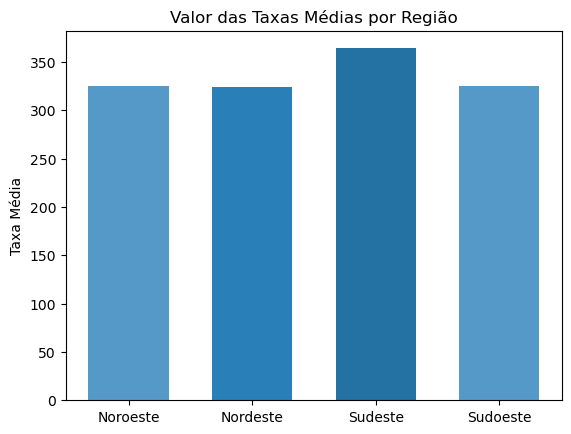

In [81]:
region_categories = ["Noroeste", "Nordeste", "Sudeste", "Sudoeste"]

region_amount = list()
region_amount.append(medical_insurance.loc[medical_insurance.region == 'northwest'].charges.count())
region_amount.append(medical_insurance.loc[medical_insurance.region == 'northeast'].charges.count())
region_amount.append(medical_insurance.loc[medical_insurance.region == 'southeast'].charges.count())
region_amount.append(medical_insurance.loc[medical_insurance.region == 'southwest'].charges.count())

#-Colors 
colors = ["#5499c7","#2980b9","#2471a3"]

#-Plot the bars accordinly to the y-coordinates (service_amount) and x-coordinates
plt.bar(range(len(region_categories)), region_amount, color=colors, width=0.65)

#-Adding chart title
plt.title("N° de Pessoas por Região")

#-Naming the y-axis
plt.ylabel("N° de Pessoas")

#-Naming the bars accordinly
plt.xticks(range(len(region_categories)), region_categories)

#-Displaying chart
plt.show()

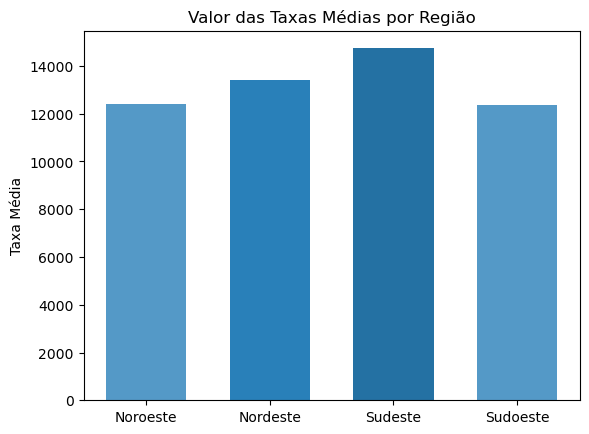

In [78]:
region_categories = ["Noroeste", "Nordeste", "Sudeste", "Sudoeste"]

region_amount = list()
region_amount.append(medical_insurance.loc[medical_insurance.region == 'northwest'].charges.mean())
region_amount.append(medical_insurance.loc[medical_insurance.region == 'northeast'].charges.mean())
region_amount.append(medical_insurance.loc[medical_insurance.region == 'southeast'].charges.mean())
region_amount.append(medical_insurance.loc[medical_insurance.region == 'southwest'].charges.mean())

#-Colors 
colors = ["#5499c7","#2980b9","#2471a3"]

#-Plot the bars accordinly to the y-coordinates (service_amount) and x-coordinates
plt.bar(range(len(region_categories)), region_amount, color=colors, width=0.65)

#-Adding chart title
plt.title("Valor das Taxas Médias por Região")

#-Naming the y-axis
plt.ylabel("Taxa Média")

#-Naming the bars accordinly
plt.xticks(range(len(region_categories)), region_categories)

#-Displaying chart
plt.show()

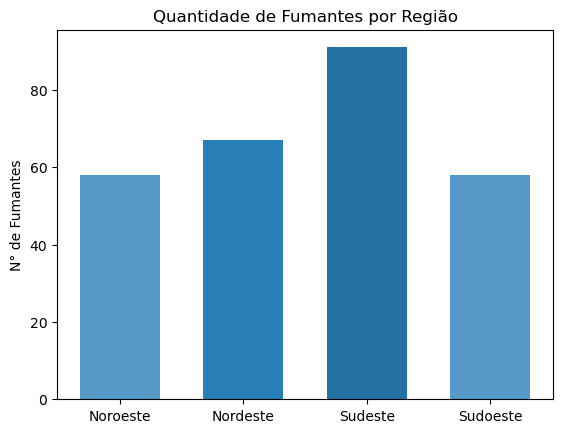

In [84]:
region_categories = ["Noroeste", "Nordeste", "Sudeste", "Sudoeste"]

region_amount = list()
region_amount.append(medical_insurance.loc[(medical_insurance.region == 'northwest') & (medical_insurance.smoker == 'yes')].smoker.count())
region_amount.append(medical_insurance.loc[(medical_insurance.region == 'northeast') & (medical_insurance.smoker == 'yes')].smoker.count())
region_amount.append(medical_insurance.loc[(medical_insurance.region == 'southeast') & (medical_insurance.smoker == 'yes')].smoker.count())
region_amount.append(medical_insurance.loc[(medical_insurance.region == 'southwest') & (medical_insurance.smoker == 'yes')].smoker.count())

#-Colors 
colors = ["#5499c7","#2980b9","#2471a3"]

#-Plot the bars accordinly to the y-coordinates (service_amount) and x-coordinates
plt.bar(range(len(region_categories)), region_amount, color=colors, width=0.65)

#-Adding chart title
plt.title("Quantidade de Fumantes por Região")

#-Naming the y-axis
plt.ylabel("N° de Fumantes")

#-Naming the bars accordinly
plt.xticks(range(len(region_categories)), region_categories)

#-Displaying chart
plt.show()